In [1]:
import pandas as pd
import numpy as np

# Uploading the dataset:

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv",index_col=0)

In [3]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
df.shape

(750000, 8)

# Exploring the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [6]:
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Encoding the categorical_column:

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['Sex']=le.fit_transform(df['Sex'])

In [11]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


# plotting the Distribution:

### For Age columns:

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


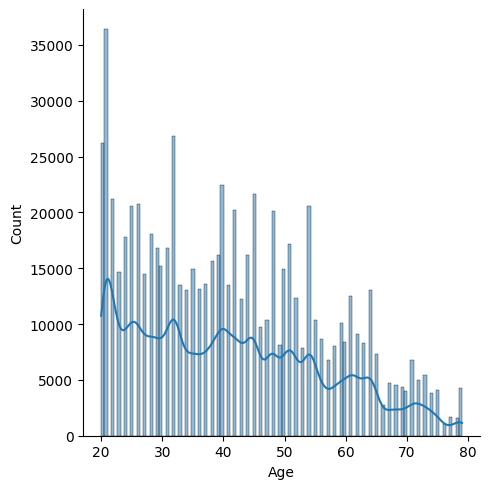

In [13]:
sns.displot(df['Age'],kde=True)
plt.show()

<Axes: >

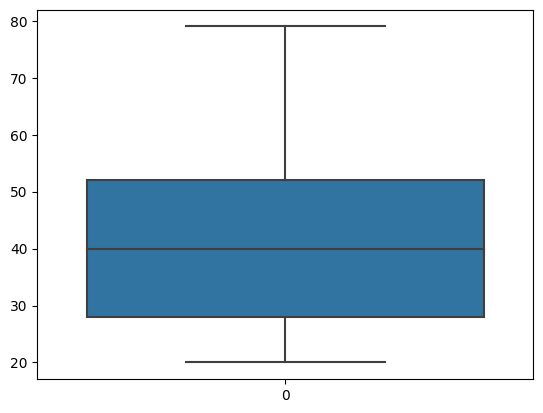

In [14]:
sns.boxplot(df['Age'])

### For height columns:

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


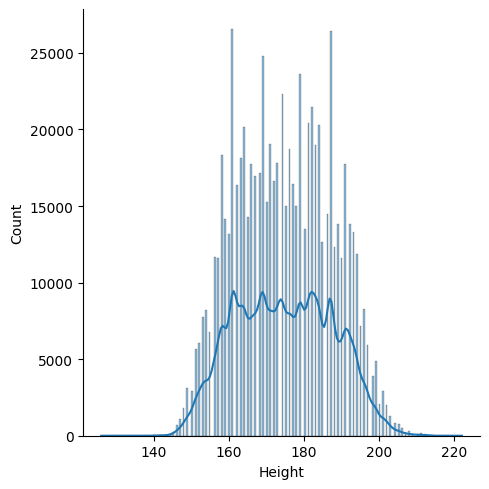

In [15]:
sns.displot(df['Height'],kde=True)

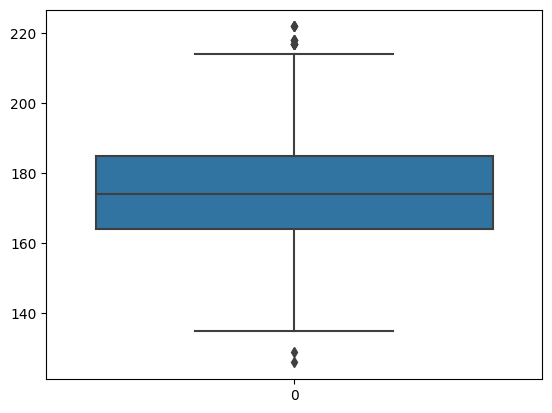

In [16]:
sns.boxplot(df['Height'])
plt.show()

In [17]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

### for weight columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


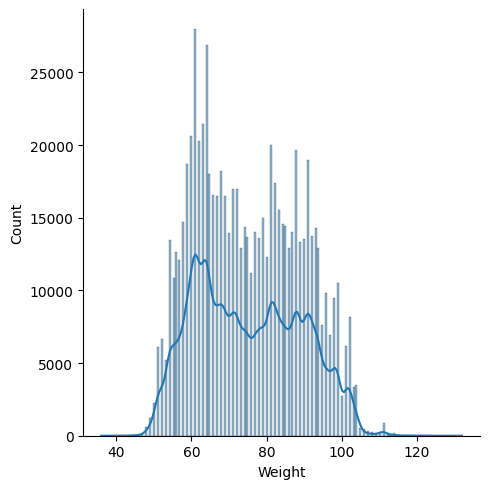

In [18]:
sns.displot(df['Weight'],kde=True)

<Axes: >

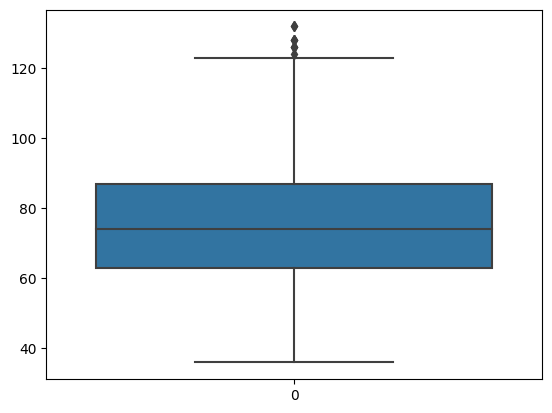

In [19]:
sns.boxplot(df['Weight'])

### Duration:	

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


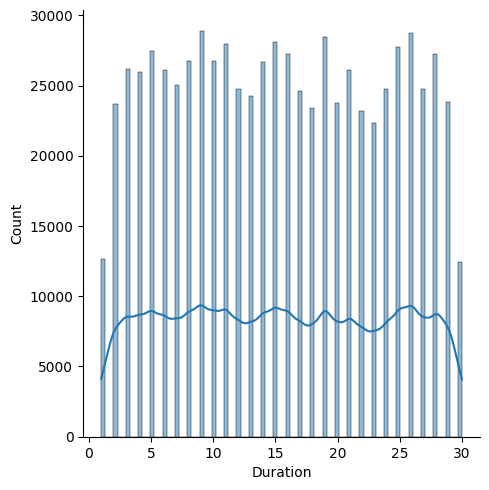

In [20]:
sns.displot(df['Duration'],kde=True)

<Axes: >

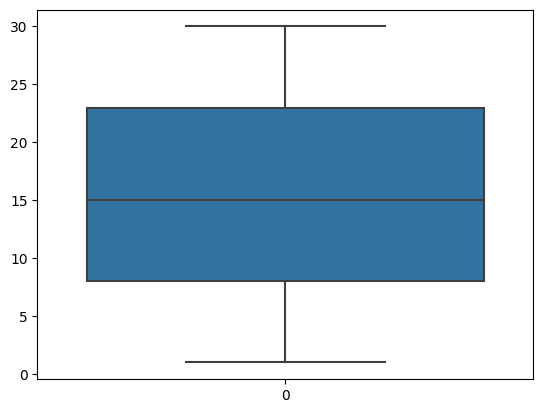

In [21]:
sns.boxplot(df['Duration'])

### Heart_Rate:

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


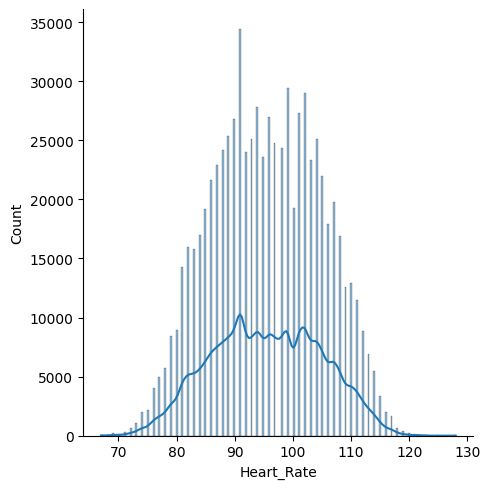

In [22]:
sns.displot(df['Heart_Rate'],kde=True)

<Axes: >

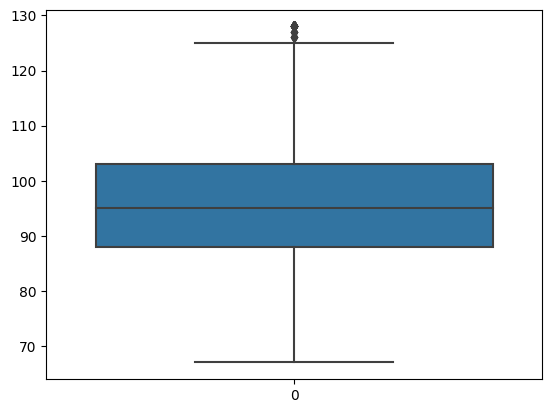

In [23]:
sns.boxplot(df['Heart_Rate'])

### Body_Temp

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


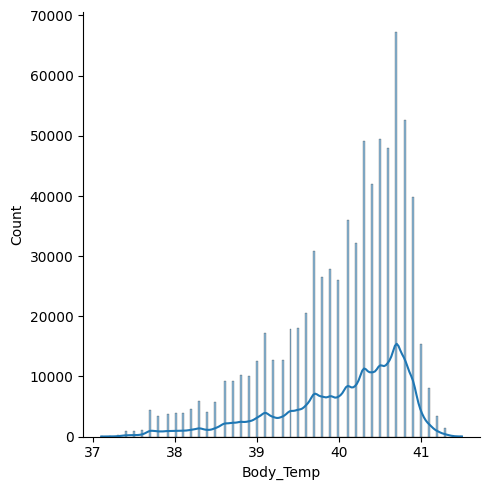

In [24]:
sns.displot(df['Body_Temp'],kde=True)

<Axes: >

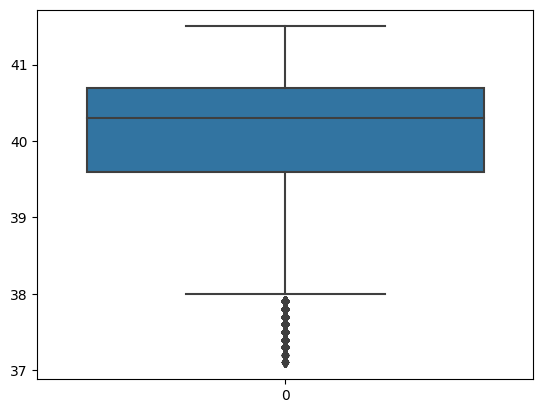

In [25]:
sns.boxplot(df['Body_Temp'])

# Handling the outliers:

In [26]:

# Function to detect and clip outliers using IQR
def clip_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clipping the column values to the lower and upper bounds
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply the clipping function to numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = clip_outliers_iqr(df[col])

# Display the DataFrame after clipping
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


# correlation of feature with target_col:

In [27]:
df.corr()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Sex,1.000000,0.009689,0.755913,0.818259,-0.009594,0.009113,-0.015499,0.011981
Age,0.009689,1.000000,0.011976,0.073690,0.015656,0.017030,0.029482,0.145647
Height,0.755913,0.011976,1.000000,0.957972,-0.029938,-0.013245,-0.034198,-0.004067
Weight,0.818259,0.073690,0.957972,1.000000,-0.020848,-0.002398,-0.023281,0.015818
Duration,-0.009594,0.015656,-0.029938,-0.020848,1.000000,0.875341,0.908494,0.959958
Heart_Rate,0.009113,0.017030,-0.013245,-0.002398,0.875341,1.000000,0.800557,0.908762
Body_Temp,-0.015499,0.029482,-0.034198,-0.023281,0.908494,0.800557,1.000000,0.834946
Calories,0.011981,0.145647,-0.004067,0.015818,0.959958,0.908762,0.834946,1.000000


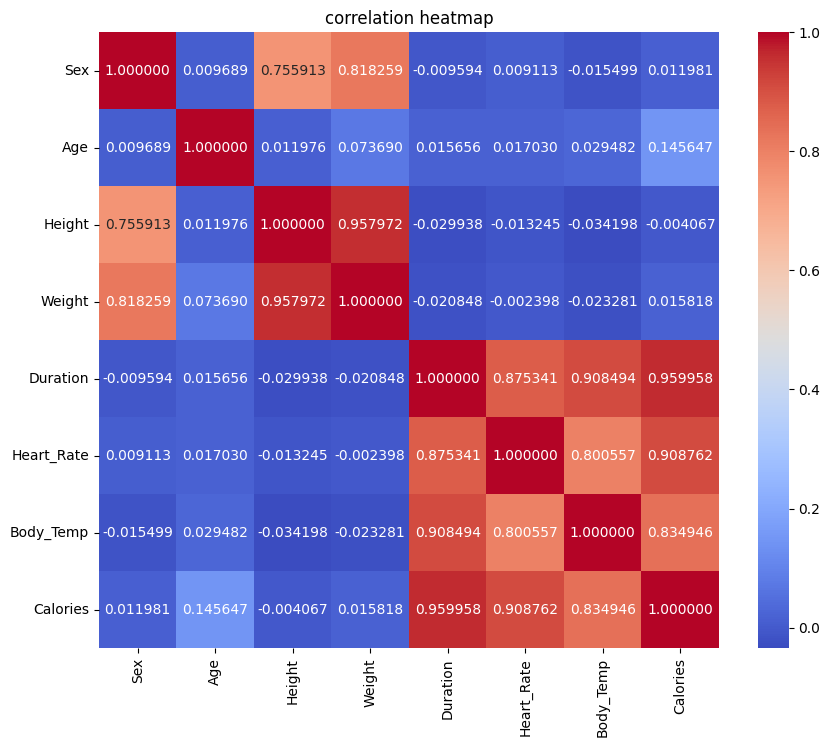

In [28]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='2f')
plt.title('correlation heatmap')
plt.show()

# Splitting the dataset in training and testing:

In [29]:
x=df.drop('Calories',axis=1)
y=df['Calories']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [32]:
x_train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
707701,0,22,177.0,63.0,6.0,84.0,39.1
657036,1,79,193.0,94.0,15.0,87.0,40.5
203978,0,50,158.0,62.0,15.0,85.0,40.0
222200,0,63,164.0,61.0,13.0,88.0,39.7
177069,0,59,170.0,74.0,25.0,106.0,40.7


# Training the model:

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model_rf=RandomForestRegressor()

In [35]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred_rf=model_rf.predict(x_test)

In [37]:
y_pred_rf

array([  6.22      ,  13.04666667, 227.85      , ..., 180.53      ,
        30.42      ,  53.92      ])

# Evaluating the model Perfomence:

In [38]:
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
y_test_log=np.log(y_test)
y_pred_log=np.log(y_pred_rf)

In [40]:
rmsle=np.sqrt(mean_squared_error(y_test_log,y_pred_log))

In [41]:
rmsle

0.0717071854360488

# loading the test data:


In [42]:
df_test=pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv",index_col=0)

In [43]:
df_test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
750000,male,45,177.0,81.0,7.0,87.0,39.8
750001,male,26,200.0,97.0,20.0,101.0,40.5
750002,female,29,188.0,85.0,16.0,102.0,40.4
750003,female,39,172.0,73.0,20.0,107.0,40.6
750004,female,30,173.0,67.0,16.0,94.0,40.5


# Encoding:

In [44]:
df_test['Sex']=le.transform(df_test['Sex'])

In [45]:
df_test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
750000,1,45,177.0,81.0,7.0,87.0,39.8
750001,1,26,200.0,97.0,20.0,101.0,40.5
750002,0,29,188.0,85.0,16.0,102.0,40.4
750003,0,39,172.0,73.0,20.0,107.0,40.6
750004,0,30,173.0,67.0,16.0,94.0,40.5


# Handling the Outliers:

In [46]:

# Function to detect and clip outliers using IQR
def clip_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clipping the column values to the lower and upper bounds
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply the clipping function to numerical columns
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    df_test[col] = clip_outliers_iqr(df_test[col])

# Display the DataFrame after clipping
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


# Making the prediction:

In [47]:
test_pred=model_rf.predict(df_test)

In [48]:
test_pred

array([ 27.32, 106.36,  87.52, ...,  73.62, 169.28,  78.33])

In [49]:
submission_df=pd.DataFrame({'id':df_test.index,'Calories':test_pred})

In [50]:
submission_df.head()

,id,Calories
0,750000,27.320000
1,750001,106.360000
2,750002,87.520000
3,750003,126.130000
4,750004,76.613333


In [51]:
submission_df.to_csv('submission_rf.csv',index=False)